###  회귀분석 (가구소득과 교육,나이) :  2023-09-12

In [4]:
# 회귀분석

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
folder_dir = 'C:/data\실습데이터'
DATA_FILE = "education.csv"

df=pd.read_csv(folder_dir + "/" + DATA_FILE)



In [5]:
df1=df.loc[(df['income']>0)& (df['age']>0)&(df['education_year']>0) ]
df2=df1.copy()

df2['age2']=df2['age']**2


y=df2['income']
x=df2[['education_year','age2']]  # ,'age2'


#x=df2[['education_year','age','age2']]
# y=np.log(df2[['income']])
# x=np.log(df2[['education_year','age','age2']])


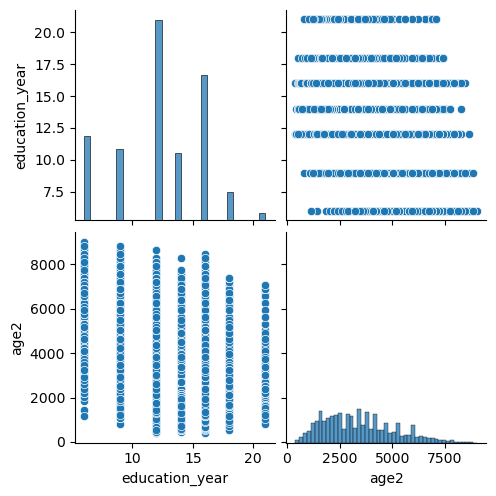

In [7]:
# 변수간 관계 그래프

sns.pairplot(x[['education_year','age2']]);

C:\Users\wonee\AppData\Local\Temp\ipykernel_7312\1831889752.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


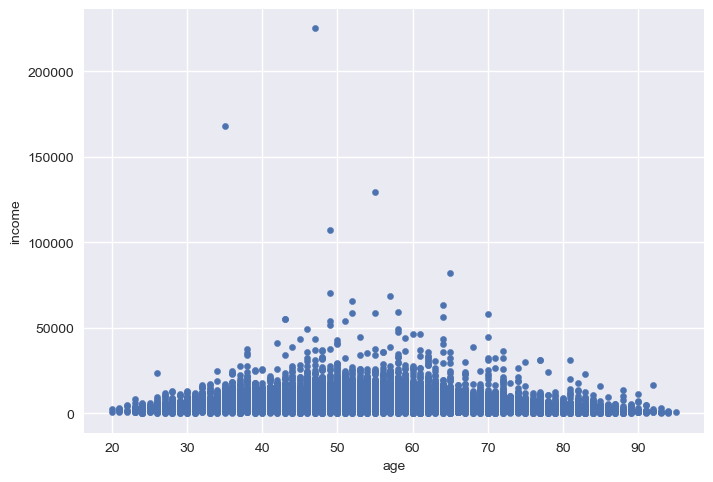

In [8]:
plt.style.use('seaborn')
df2.plot(x='age',y='income',kind='scatter')
plt.show()

In [9]:
# 회귀분석 실행


x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1538.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:07:59   Log-Likelihood:            -1.7084e+05
No. Observations:               17135   AIC:                         3.417e+05
Df Residuals:                   17132   BIC:                         3.417e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -741.7231    232.878     -3.

In [11]:
# 다중공선성 체크

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,34.7,const
1,1.4,education_year
2,1.4,age2
